# Logistical Database

## Read Data in Pandas library

In [9]:
#Bibliotecas
import pandas as pd
import datetime as dt

In [10]:
#Arquivo
df = pd.read_csv(r"C:\Users\jgdsantos\OneDrive\Aralco\5. Material Complementar\Projetos\DB_Logistical\Analise_Python\BD_Logistica.csv", encoding='latin-1', sep = ';')

In [11]:
df.head(5)

,N§ Pedido,Cliente - Motorista,Data EmissÆo Pedido,Data Entrega Prevista,Destino,Itens,R$ Faturados,Sa¡da para Entrega,Data Entrega Real,Qtd DevoluÆo,Mot. DevoluÆo,Dias Para Entrega,Status
0,A3,WALMART-FELIPE SILVA,27/01/2019,06/02/2019,SP,3,"139,5",29/01/2019,03/02/2019,0,S/ Devolu.,7,No Prazo
1,A4,MAGAZINE LUIZA-TéLIO SILVEIRA,28/01/2019,07/02/2019,RJ,4,"134,4",09/02/2019,12/02/2019,0,S/ Devolu.,15,Atrasado
2,A7,MAGAZINE LUIZA-VALDIR ESPINOSA,04/02/2019,14/02/2019,SP,5,"79,5",07/02/2019,14/02/2019,1,Produto Errado,10,No Prazo
3,A12,MAGAZINE LUIZA-MARCOS LEROY,18/02/2019,28/02/2019,SP,20,"326,0",23/02/2019,25/02/2019,11,Produto Errado,7,No Prazo
4,A15,WALMART-LUIZ PARDAL,21/02/2019,03/03/2019,RJ,12,"597,6",28/02/2019,07/03/2019,0,S/ Devolu.,14,Atrasado


In [12]:
#Duplicata Original
df_or = df

## FIRST DATA ANALYSYS IN THE DATAFRAME

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   N§ Pedido              4282 non-null   object
 1   Cliente - Motorista    4282 non-null   object
 2   Data EmissÆo Pedido    4282 non-null   object
 3   Data Entrega Prevista  4282 non-null   object
 4   Destino                4282 non-null   object
 5   Itens                  4282 non-null   int64 
 6   R$ Faturados           4282 non-null   object
 7   Sa¡da para Entrega     4282 non-null   object
 8   Data Entrega Real      4282 non-null   object
 9    Qtd DevoluÆo         4282 non-null   int64 
 10  Mot. DevoluÆo         4282 non-null   object
 11  Dias Para Entrega      4282 non-null   int64 
 12  Status                 4282 non-null   object
dtypes: int64(3), object(10)
memory usage: 435.0+ KB


In [14]:
#Separando a Coluna por Delimitador
df[['Cliente', 'Motorista']] = df['Cliente - Motorista'].str.split('-', expand=True)
df.drop('Cliente - Motorista', axis=1, inplace=True)


In [15]:
#STRIP limpando todas as colunas STR
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x )

In [16]:
#Aplicando o formato correto nas colunas de data
colunas_datas = [
    'Data Entrega Real',
    'Data EmissÆo Pedido',
    'Data Entrega Prevista',
    'Sa¡da para Entrega'
]

for coluna in colunas_datas:
    df[coluna] = pd.to_datetime(df[coluna], errors='coerce', dayfirst=True)

In [17]:
#Informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   N§ Pedido              4282 non-null   object        
 1   Data EmissÆo Pedido    4282 non-null   datetime64[ns]
 2   Data Entrega Prevista  4282 non-null   datetime64[ns]
 3   Destino                4282 non-null   object        
 4   Itens                  4282 non-null   int64         
 5   R$ Faturados           4282 non-null   object        
 6   Sa¡da para Entrega     4282 non-null   datetime64[ns]
 7   Data Entrega Real      4282 non-null   datetime64[ns]
 8    Qtd DevoluÆo         4282 non-null   int64         
 9   Mot. DevoluÆo         4282 non-null   object        
 10  Dias Para Entrega      4282 non-null   int64         
 11  Status                 4282 non-null   object        
 12  Cliente                4282 non-null   object        
 13  Mot

In [18]:
#Exibindo o DataFrame
display(df)

,N§ Pedido,Data EmissÆo Pedido,Data Entrega Prevista,Destino,Itens,R$ Faturados,Sa¡da para Entrega,Data Entrega Real,Qtd DevoluÆo,Mot. DevoluÆo,Dias Para Entrega,Status,Cliente,Motorista
0,A3,2019-01-27,2019-02-06,SP,3,"139,5",2019-01-29,2019-02-03,0,S/ Devolu.,7,No Prazo,WALMART,FELIPE SILVA
1,A4,2019-01-28,2019-02-07,RJ,4,"134,4",2019-02-09,2019-02-12,0,S/ Devolu.,15,Atrasado,MAGAZINE LUIZA,TéLIO SILVEIRA
2,A7,2019-02-04,2019-02-14,SP,5,"79,5",2019-02-07,2019-02-14,1,Produto Errado,10,No Prazo,MAGAZINE LUIZA,VALDIR ESPINOSA
3,A12,2019-02-18,2019-02-28,SP,20,"326,0",2019-02-23,2019-02-25,11,Produto Errado,7,No Prazo,MAGAZINE LUIZA,MARCOS LEROY
4,A15,2019-02-21,2019-03-03,RJ,12,"597,6",2019-02-28,2019-03-07,0,S/ Devolu.,14,Atrasado,WALMART,LUIZ PARDAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,A9675,2021-11-27,2021-12-07,RJ,16,"763,2",2021-12-12,2021-12-15,1,Produto Errado,18,Atrasado,MAGAZINE LUIZA,VALDIR ESPINOSA
4278,A9676,2021-11-28,2021-12-08,SP,14,"226,8",2021-12-10,2021-12-12,1,Produto Errado,14,Atrasado,WALMART,LUIZ PARDAL
4279,A9680,2021-12-02,2021-12-12,SP,17,"821,1",2021-12-19,2021-12-20,2,Danificado,18,Atrasado,CASA E VIDEO,TéLIO SILVEIRA
4280,A9681,2021-12-03,2021-12-13,SP,1,"49,8",2021-12-08,2021-12-17,0,S/ Devolu.,14,Atrasado,RICARDO ELETRO,MARCOS LEROY


## Analyse the variables

In [19]:
#Quantidade distinta
df.nunique()

N§ Pedido                4282
Data EmissÆo Pedido       836
Data Entrega Prevista     836
Destino                     3
Itens                      20
R$ Faturados              709
Sa¡da para Entrega        830
Data Entrega Real         832
 Qtd DevoluÆo             20
Mot. DevoluÆo              4
Dias Para Entrega          18
Status                      2
Cliente                     6
Motorista                   6
dtype: int64

In [20]:
#Quantidade distinta de elementos em cada lista
for i in df.columns:
    print(df[i].value_counts(),'SUM',df[i].value_counts().sum(),"\n\n")
    

N§ Pedido
A3       1
A6605    1
A6577    1
A6584    1
A6585    1
        ..
A3292    1
A3294    1
A3297    1
A3299    1
A9683    1
Name: count, Length: 4282, dtype: int64 SUM 4282 


Data EmissÆo Pedido
2020-08-23    26
2020-06-24    25
2020-08-17    23
2020-09-23    22
2020-07-21    22
              ..
2020-01-01     1
2019-12-31     1
2019-12-30     1
2019-12-24     1
2021-12-06     1
Name: count, Length: 836, dtype: int64 SUM 4282 


Data Entrega Prevista
2020-09-02    26
2020-07-04    25
2020-08-27    23
2020-10-03    22
2020-07-31    22
              ..
2020-01-11     1
2020-01-10     1
2020-01-09     1
2020-01-03     1
2021-12-16     1
Name: count, Length: 836, dtype: int64 SUM 4282 


Destino
BH    1496
SP    1412
RJ    1374
Name: count, dtype: int64 SUM 4282 


Itens
7     240
11    236
18    234
3     231
2     230
15    230
1     229
17    221
12    219
20    218
14    216
13    209
16    209
8     206
9     203
6     196
4     192
5     192
19    188
10    183
Name: count, d

In [21]:
#Valores Nulos
df.isnull().sum()

N§ Pedido                0
Data EmissÆo Pedido      0
Data Entrega Prevista    0
Destino                  0
Itens                    0
R$ Faturados             0
Sa¡da para Entrega       0
Data Entrega Real        0
 Qtd DevoluÆo           0
Mot. DevoluÆo           0
Dias Para Entrega        0
Status                   0
Cliente                  0
Motorista                0
dtype: int64

In [22]:
#Verificando Porcentagens
df['Status'].value_counts()/ df.shape[0]*100

Status
Atrasado    73.213452
No Prazo    26.786548
Name: count, dtype: float64

In [31]:
#Descrevendo a Variável Estatísticamente
df.describe()

,Data EmissÆo Pedido,Data Entrega Prevista,Itens,Sa¡da para Entrega,Data Entrega Real,Qtd DevoluÆo,Dias Para Entrega
count,4282,4282,4282.000000,4282,4282,4282.000000,4282.000000
mean,2020-10-04 23:56:38.225128704,2020-10-14 23:56:38.225128704,10.492994,2020-10-11 14:13:10.284913664,2020-10-18 02:50:29.985987584,1.861747,13.120738
min,2019-01-27 00:00:00,2019-02-06 00:00:00,1.000000,2019-01-29 00:00:00,2019-02-03 00:00:00,0.000000,3.000000
25%,2020-07-21 00:00:00,2020-07-31 00:00:00,5.000000,2020-07-27 00:00:00,2020-08-03 00:00:00,1.000000,10.000000
50%,2020-10-02 00:00:00,2020-10-12 00:00:00,11.000000,2020-10-08 00:00:00,2020-10-15 00:00:00,1.000000,13.000000
75%,2020-12-15 00:00:00,2020-12-25 00:00:00,15.000000,2020-12-24 00:00:00,2020-12-31 00:00:00,2.000000,16.000000
max,2021-12-06 00:00:00,2021-12-16 00:00:00,20.000000,2021-12-19 00:00:00,2021-12-20 00:00:00,19.000000,20.000000
std,NaN,NaN,5.802526,NaN,NaN,2.421298,3.816712


# Analyzes and Visualization

In [24]:
#Bilbiotecas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
# Agrupar os dados por 'Status' e contar o número de ocorrências
df_aggregated = df.groupby('Status', as_index=True).size()

# Renomear a coluna para 'Count'
df_aggregated = df_aggregated.rename('Count')

df_aggregated = df_aggregated.reset_index()
df_aggregated = df_aggregated.rename(columns={'index': 'Status'})
print(df_aggregated)



     Status  Count
0  Atrasado   3135
1  No Prazo   1147


In [26]:
import plotly.express as px

# Agrupar os dados por 'Status' e somar os valores da coluna 'Itens'

# Gráfico de barras
fig = px.bar(df_aggregated, 
             x='Status', 
             y='Count', 
             color='Status', 
             title='Quantidade Total de Itens por Status',
             labels={'Status': 'Status do Item', 'Status': 'Status'})


# Exibe o gráfico
fig.show()


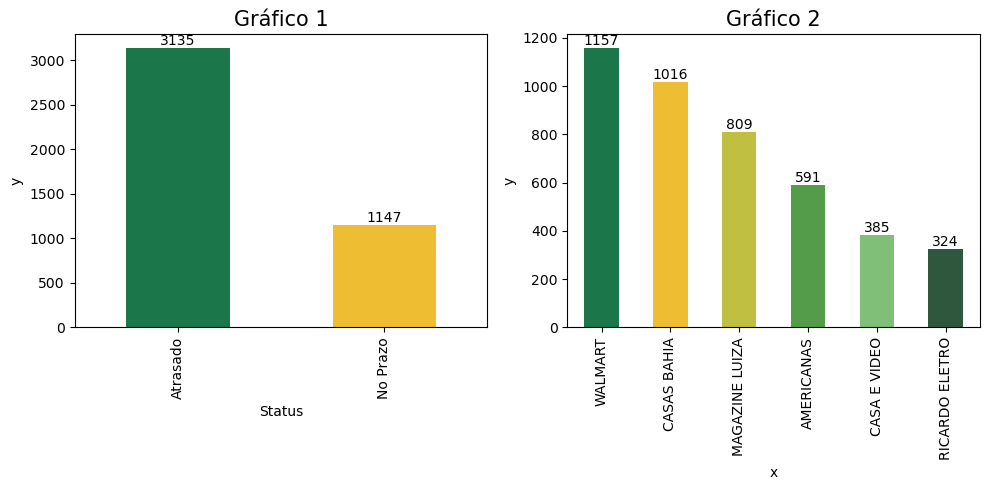

In [27]:
import matplotlib.pyplot as plt

# Dados
Graf1 = df['Status'].value_counts()
Graf2 = df['Cliente'].value_counts()

# Criando a figura com dois gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

Graf_color = ['#1b764a', '#eebd32', '#bfc041', '#549C4A', '#80BF77', '#2e573d']

# Gráfico 1
Graf1.plot(kind='bar', color=Graf_color, ax=ax1)
ax1.set_title('Gráfico 1', fontsize=15)
ax1.set_ylabel('y')

# Gráfico 2
Graf2.plot(kind='bar', color=Graf_color, ax=ax2)
ax2.set_title('Gráfico 2', fontsize=15)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Adicionando os valores nas barras de Graf1
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Adicionando os valores nas barras de Graf2
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Ajustando o layout
plt.tight_layout()
plt.show()


# DashBoard

In [28]:
import streamlit as st

In [29]:
st.set_page_config(layout='wide')